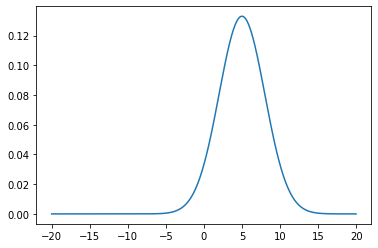

In [5]:
from skneuromsi.alais_burr2004 import AlaisBurr2004
import matplotlib.pyplot as plt

model = AlaisBurr2004()
out = model.run(visual_location=5, auditory_location=5)

plt.plot(model.posible_locations,out);

In [17]:
# Maybe change run to give unisensory and multisensory outputs
# Thinking about the user, not so easy to get weights and locations outside the model. 
# It is a bit un confusing the notion of stimuli.... one thing is the stimuli and other the stimuli decoding